# Proyecto 03 - Sistemas de Recomendación

### Autor: Nicolás Bianco

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

#### GitHub
Link con el acceso al repositorio: https://github.com/greenick1093/prj_sprint3

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
data_reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN


In [5]:
data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

**Games**

In [6]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [7]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [8]:
data_games[data_games.id == '35140']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


## EDA - Análisis exploratorio de datos

Para dar inicio a este proyecto comenzaré realizando un análisis exploratorio de datos, con el objetivo de optimizarlo de cara al sistema de recomendación.
Lo voy a desarrollar en dos pasos, primero realizar un EDA en el dataset de "Reviews" y luego lo mismo pero en el de "Games"

Importo las librerias a utilizar

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import GridSearchCV

### EDA - Dataset Reviews

#### Eliminación de columnas

In [10]:
print("Valores faltantes por columna")
data_reviews.isna().sum(0)

Valores faltantes por columna


username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

Las columnas "page_order", "text", "page" las elimino ya que no son datos que aporten al sistema de recomendación.

En el caso de "user_id" y "compensation" son columnas que tienen demasiados valores nulos, por lo que también las voy a eliminar

In [11]:
drop_columnsReviws = ['page_order','text','page','compensation','user_id']
reviews = data_reviews.drop(columns=drop_columnsReviws,axis=1)
reviews

,username,hours,products,product_id,date,early_access,found_funny
0,Chaos Syren,0.1,41.0,725280,2017-12-17,False,NaN
1,Ariman1,13.2,1386.0,328100,2017-08-02,False,NaN
2,freakfantom,0.1,1706.0,725280,2017-11-12,False,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,2017-12-11,False,NaN
4,the_maker988,8.2,18.0,35140,2018-01-02,False,NaN
...,...,...,...,...,...,...,...
779302,Vidaar,783.5,353.0,252490,2013-12-11,True,NaN
779303,Nikolai Belinski,55.1,204.0,252490,2013-12-11,True,NaN
779304,RancorZealot,203.5,173.0,252490,2013-12-11,True,NaN
779305,Jerry,139.8,79.0,252490,2013-12-11,True,NaN


In [12]:
reviews.shape

(779307, 7)

#### Imputación de valores faltantes

##### Columna `Hours`

Los valores faltantes en este dataset se encuentran en las columnas de "hours", "products" y "found_funny".
Voy a analizar un poco más en detalle cada una de ellas para aplicar una imputación de valores faltantes que mejor se adapte

In [13]:
print("Descripción de las columnas")
reviews.describe()

Descripción de las columnas


,hours,products,found_funny
count,776670.000000,777741.000000,120164.000000
mean,111.843832,236.993936,7.713125
std,390.145376,486.034479,72.465816
min,0.000000,1.000000,1.000000
25%,4.000000,45.000000,1.000000
50%,15.300000,110.000000,1.000000
75%,59.600000,246.000000,3.000000
max,28164.000000,13540.000000,6524.000000


In [14]:
reviews['hours'].groupby(reviews['product_id']).mean().round(1)
# Veo para todos los juegos el promedio de horas que fueron jugados

product_id
10        234.3
1002        0.7
100400     61.3
10090      93.3
100980    119.4
          ...  
9970        0.2
99700       5.7
9980        9.5
99900     210.9
99910      80.8
Name: hours, Length: 12665, dtype: float64

In [15]:
# Hago una función lambda para que me llene en cada valor faltante el promedio de horas de acuerdo al juego que es
reviews['hours'] = reviews['hours'].groupby(reviews['product_id']).apply(lambda x: x.fillna(np.mean(x)))

reviews['hours'].isna().sum() # Cuento la cantidad de valores faltantes en dicha columna

1035

In [16]:
# Como aún hay valores faltantes, busco cuales son las reviews que no tienen horas
sinHoras = reviews.loc[reviews.hours.isna() == True]
sinHoras

,username,hours,products,product_id,date,early_access,found_funny
30689,seed1yet,NaN,54.0,550210,2017-12-18,False,3.0
54343,Berillium,NaN,667.0,569410,2017-11-06,False,NaN
54356,Titan Hamad,NaN,34.0,569410,2017-01-07,False,NaN
54750, Dargno ,NaN,148.0,488470,2017-08-22,False,NaN
54768,Cory Baxter,NaN,80.0,488470,2016-06-20,False,1.0
...,...,...,...,...,...,...,...
610763,Quacker,NaN,137.0,567810,2017-03-16,False,NaN
617443,yannick034,NaN,70.0,666200,2017-12-31,False,NaN
650268,Oh No,NaN,442.0,385520,2017-12-28,False,NaN
650273,Jyromefedx,NaN,394.0,385520,2016-05-26,False,NaN


In [17]:
# Voy a empezar a analizar caso por caso para saber si todos los valores NaN que quedan en "hours" pertenecen a grupos
# de "product_id" en donde todas las reviews no tienen horas de juego
cant = 0
for i,row in sinHoras.iterrows():
    p = row.product_id
    mean = reviews.loc[reviews.product_id == p]['hours'].mean()
    if(np.isnan(mean)):
        cant = cant
    else:
        cant = cant +1
if(cant==0):
    print("Todos los promedios de las horas de los product_id que quedan son NaN")
else:
    print("Hay promedios que no son NaN")

Todos los promedios de las horas de los product_id que quedan son NaN


Ahora si, puedo asegurar que todos los casos que quedan son de aquellos grupos de "produt_id" que sus valores de horas jugadas son NaN, por lo que le pondré un 0 a todos ellos

In [18]:
reviews['hours'] = reviews['hours'].fillna(0) # Hago un fillna con 0 para poner en todos los NaN de "hours" un 0

reviews['hours'].isna().sum() # Cuento la cantidad de valores faltantes en dicha columna

0

##### Columna `Products`

En este caso, al tratarse de los valores faltantes para la columna de "products", lo que voy a realizar es ponerle a los NaN el promedio de la columna

In [19]:
reviews['products'] = reviews['products'].fillna(reviews.products.mean())

reviews['products'].isna().sum() # Chequeo la cantidad de valores nulos en la columna

0

##### Columna `Found funny`

De acuerdo a lo que estuve buscando en internet, la columna `found_funny` es la cantidad de "Likes" que tuvo el comentario de un usuario, es decir, qué cantidad de personas les gustó la review que hizo un usuario sobre un juego en particular. Es por esto, que a los NaN les voy a poner 0

In [20]:
reviews['found_funny'] = reviews['found_funny'].fillna(0)
reviews['found_funny'].isna().sum()

0

#### Detección y eliminación de Outliers

##### Análisis de columna `Hours`

<AxesSubplot:xlabel='hours'>

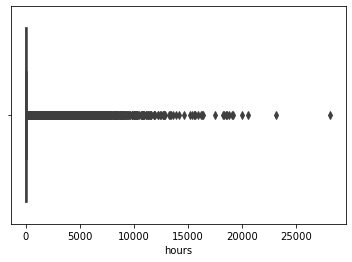

In [21]:
sns.boxplot(data=reviews, x='hours')

Hay una gran dispersión de datos. Al ver la información del `describe()` realizado antes, podemos ver que el 75% de los datos se encuentra por debajo de 60 horas

<AxesSubplot:xlabel='hours'>

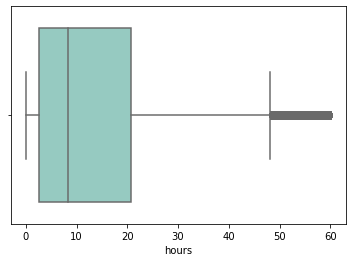

In [22]:
sns.boxplot(data=reviews[(reviews.hours <= 60)], x='hours', palette="Set3")
# En el boxplot filtro para ver cómo se distribuyen las horas menores a 60 

La elección de quedarme con las reviews de aquellas personas que jugaron menos de 60 horas parece adecuada ya que nos quedamos con la mayoría de las reviews, eliminando outliers que pueden generar ruido al modelo. Además, gracias al boxpltot, se puede apreciar que entre 50 y 60 hay algunos outliers cercanos a la "caja" del boxplot, los cuales se consideran buena práctica dejar

In [23]:
reviews = reviews[(reviews.hours <= 60)]
reviews.shape

(585819, 7)

Voy a corroborar que la cantidad de horas jugadas no sea menor que 0, ya que eso sería un error

In [24]:
reviews['hours'].min()

0.0

##### Análisis de columna `Products`

<AxesSubplot:xlabel='products'>

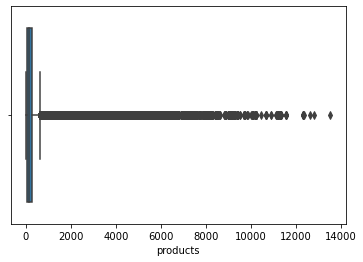

In [25]:
sns.boxplot(data=reviews, x='products')

En este caso también se nota una gran dispersión de los datos, es por eso que voy a filtrar para no generar ruido en el dataset

<AxesSubplot:xlabel='products'>

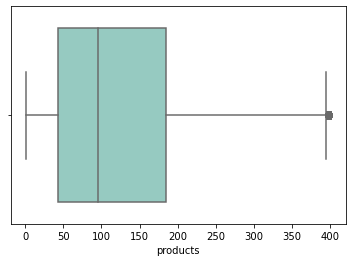

In [26]:
sns.boxplot(data=reviews[(reviews.products <= 400)], x='products', palette="Set3")
# En el boxplot filtro para ver cómo se distribuyen la cantidad de productos menor a 400

In [27]:
reviews = reviews[(reviews.products <= 400)]
reviews.shape

(492321, 7)

Para asegurar que todos los datos sean correctos voy a ver si hay usuarios sin juegos que hayan dado opiniones. Aca se espera que todos los usuarios minimamente tengan 1 juego, ya que no tiene sentido una review de una persona que no jugó el juego

In [28]:
reviews['products'].min()

1.0

##### Análisis de  la columna `found_funny`

<AxesSubplot:xlabel='found_funny'>

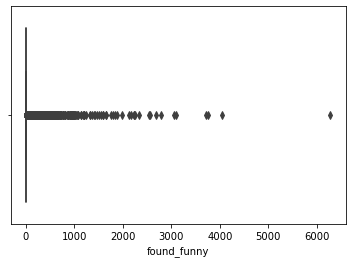

In [29]:
sns.boxplot(data=reviews, x='found_funny')

Debido a la dispersión de la columna found_funny, voy a realizar un distplot para ver como se distribuye este dato para aquellos comentarios que tuvieron 10 o menos likes, es decir en donde _found_funny <= 10_

C:\Users\nicob\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='found_funny', ylabel='Density'>

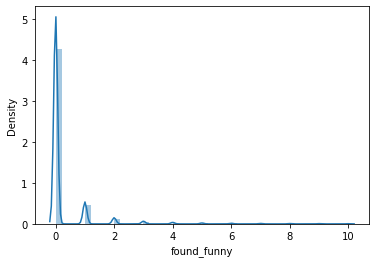

In [30]:
sns.distplot(a=reviews[reviews.found_funny<=10]['found_funny'])

In [31]:
# Para limpiar un poco el dataset, voy a contar la cantidad de registros que tienen mas de 500 en esta columna
print("Cantidad de registros menores o iguales a 500:",reviews[reviews.found_funny<=500]['found_funny'].count())
print("Cantidad de registros mayores a 500:",reviews[reviews.found_funny>500]['found_funny'].count())

Cantidad de registros menores o iguales a 500: 492188
Cantidad de registros mayores a 500: 133


Procedo a quedarme solo con los que son menores o iguales a 500

In [32]:
reviews = reviews.drop(reviews[reviews.found_funny > 500].index)
reviews.shape

(492188, 7)

#### Encoding

Como tercer paso de mi EDA, lo que voy a hacer es aplicar la técnica de Enconding.
Para esto, voy a reemplazar la columna `early_access` por los valores 1 o 0 dependiendo de si es True o False, respectivamente

In [33]:
reviews['early_access_bool'] = np.where(reviews['early_access']==True,1,0)
reviews

,username,hours,products,product_id,date,early_access,found_funny,early_access_bool
0,Chaos Syren,0.1,41.0,725280,2017-12-17,False,0.0,0
4,the_maker988,8.2,18.0,35140,2018-01-02,False,0.0,0
5,Szudof,0.2,155.0,288690,2016-08-31,False,3.0,0
6,Vonder,2.7,264.0,35600,2017-04-15,False,0.0,0
7,LucaFox,4.0,136.0,620900,2017-09-11,False,1.0,0
...,...,...,...,...,...,...,...,...
779280,Apple Cheesepie,48.7,191.0,252490,2013-12-12,True,0.0,1
779292,ZJbroski,18.7,205.0,252490,2013-12-11,True,0.0,1
779298,Slavic Psycho,3.9,135.0,252490,2013-12-11,True,0.0,1
779299,Marinetag1,1.3,98.0,252490,2013-12-11,True,0.0,1


In [34]:
# Elimino la columna "early_access" ya que no la voy a utilizar
reviews = reviews.drop(columns='early_access',axis=1)
reviews.shape

(492188, 7)

In [35]:
reviews.head()

,username,hours,products,product_id,date,found_funny,early_access_bool
0,Chaos Syren,0.1,41.0,725280,2017-12-17,0.0,0
4,the_maker988,8.2,18.0,35140,2018-01-02,0.0,0
5,Szudof,0.2,155.0,288690,2016-08-31,3.0,0
6,Vonder,2.7,264.0,35600,2017-04-15,0.0,0
7,LucaFox,4.0,136.0,620900,2017-09-11,1.0,0


Creo un archivo .csv con el dataset de reviews filtrado

In [36]:
#reviews.to_csv('reviews_filtrado.csv',index=False)

Levanto el csv que cree en la linea anterior

In [3]:
#reviews = pd.read_csv('reviews_filtrado.csv')

### EDA - Dataset Games

#### Eliminación de columnas

In [37]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [38]:
# Del dataset de Games, voy a eliminar las columnas que no me sirven o que tengan la mayoria de valores nulos 
columnas = ['url','reviews_url','discount_price','metascore']
games = data_games.drop(columns=columnas)
games.shape

(32135, 12)

In [39]:
games.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
release_date    2067
tags             163
specs            670
price           1377
early_access       0
id                 2
developer       3299
sentiment       7182
dtype: int64

In [40]:
games.head()

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,False,767400,彼岸领域,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN


#### Imputación de valores faltantes

En este caso, la única columna con valores faltantes para rellenar es `price` por lo que voy a hacer un pequeño análisis sobre las características de los juegos con valores faltantes en el precio

In [41]:
games.loc[games.price.isna() == True]

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment
9,RewindApp,"[Casual, Indie, Racing, Simulation]",Race,Race,2018-01-04,"[Indie, Casual, Simulation, Racing]","[Single-player, Multi-player, Partial Controll...",NaN,False,768800,RewindApp,NaN
10,Qucheza,"[Action, Indie, Simulation, Early Access]",Uncanny Islands,Uncanny Islands,Soon..,"[Early Access, Action, Indie, Simulation, Surv...",[Single-player],NaN,True,768570,Qucheza,NaN
31,BlueLine Games,"[Casual, Indie, Strategy]",Lost Cities,Lost Cities,2018-01-01,"[Casual, Indie, Strategy, Card Game, Board Gam...","[Single-player, Multi-player, Online Multi-Pla...",NaN,False,520680,BlueLine Games,NaN
32,Games by Brundle,[Action],Twisted Enhanced Edition,Twisted Enhanced Edition,2018-01-01,"[Action, Platformer, Side Scroller]","[Single-player, Full controller support]",NaN,False,690410,Games by Brundle,NaN
34,ProjectorGames,"[Action, Casual, Indie, Massively Multiplayer,...",Tactics Forever,Tactics Forever,2018-01-01,"[Casual, Action, Massively Multiplayer, Indie,...","[Online Multi-Player, MMO, Cross-Platform Mult...",NaN,False,413120,ProjectorGames,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32099,Picorinne Soft,"[Action, Indie]",Infinos Gaiden,Infinos Gaiden,2018-01-19,"[Action, Indie, Shoot 'Em Up]","[Single-player, Partial Controller Support]",NaN,False,771070,Picorinne Soft,NaN
32111,NaN,[Sports],International Online Soccer,International Online Soccer,2002-01-01,"[Sports, Mod]","[Multi-player, Mods (require HL2)]",NaN,False,90007,I.O.S. Team,NaN
32123,VersoVR,"[Casual, Indie, Simulation, Sports, Early Access]",Cricket Club,Cricket Club,January 2018,"[Early Access, Indie, Casual, Simulation, Sports]",[Single-player],NaN,True,772180,VersoVR,NaN
32125,Retro Army Limited,"[Action, Adventure, Indie]",The spy who shot me™,The spy who shot me™,2018-10-01,"[Action, Adventure, Indie]","[Single-player, Captions available]",NaN,False,771810,Retro Army Limited,NaN


A simple vista se puede concluir que los valores nulos no necesariamente son juegos "Free to play". 

Lo que complica este análisis es que la columna tiene strings, por lo que todos aquellos juegos que en precio tengan "Free to play" los tengo que cambiar a 0

**Aclaración**: Luego de varios intentos por intentar poner 0 en todos los "Free to play" noté que hay varias formas en las que se indica que el juego es gratis, es por esto que busqué todas las maneras.

Abajo realizo una demostración de esto

In [42]:
frases = games[pd.to_numeric(games.price, errors='coerce').isnull()]['price'].unique() # Guardo en 'frases' todos aquellos valores que no sean numéricos
frases

array(['Free To Play', 'Free to Play', nan, 'Free', 'Free Demo',
       'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
       'Free Mod', 'Install Theme', 'Third-party', 'Play Now',
       'Free HITMAN™ Holiday Pack', 'Play the Demo',
       'Starting at $499.00', 'Starting at $449.00', 'Free to Try',
       'Free Movie', 'Free to Use'], dtype=object)

In [43]:
# Elimino el nan ya que el valor null no significa que el juego sea gratuito
priceFree = np.delete(frases, 2) # En la posición 2 se encuentra el nan, es por eso que lo saco
priceFree

array(['Free To Play', 'Free to Play', 'Free', 'Free Demo',
       'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
       'Free Mod', 'Install Theme', 'Third-party', 'Play Now',
       'Free HITMAN™ Holiday Pack', 'Play the Demo',
       'Starting at $499.00', 'Starting at $449.00', 'Free to Try',
       'Free Movie', 'Free to Use'], dtype=object)

In [44]:
# Para poner un 0 en todos los juegos que son "Free", lo que voy a hacer es ir recorriendo uno por uno los precios
# para agregar el valor correcto en la lista `prices`
prices = []
for price in games['price']: # Por cada precio en la lista de juegos
    if (price in priceFree): # Si el precio se encuentra en la lista de frases
        prices.append(0) # Pongo 0, ya que el juego es free
    else:
        prices.append(price) # Sino, pongo el precio que ya tiene
        
prices

[4.99,
 0,
 0,
 0.99,
 2.99,
 3.99,
 9.99,
 18.99,
 29.99,
 nan,
 nan,
 0,
 10.99,
 3.99,
 2.99,
 1.59,
 14.99,
 1.99,
 59.99,
 4.99,
 2.99,
 0.99,
 0.99,
 2.99,
 2.99,
 4.99,
 4.99,
 9.99,
 9.99,
 1.99,
 3.99,
 nan,
 nan,
 0.99,
 nan,
 nan,
 nan,
 8.99,
 0.99,
 6.99,
 6.99,
 9.99,
 nan,
 nan,
 nan,
 nan,
 7.99,
 nan,
 10.99,
 9.99,
 9.99,
 29.99,
 1.99,
 nan,
 0.99,
 9.99,
 9.99,
 9.99,
 9.99,
 39.99,
 0,
 4.99,
 4.99,
 4.99,
 19.99,
 9.99,
 7.49,
 14.99,
 9.99,
 4.99,
 9.99,
 4.99,
 9.99,
 9.99,
 19.99,
 4.99,
 4.99,
 4.99,
 8.99,
 19.99,
 19.99,
 4.99,
 nan,
 19.99,
 4.99,
 14.99,
 4.99,
 4.99,
 4.99,
 2.99,
 2.99,
 9.99,
 2.99,
 4.99,
 4.99,
 12.99,
 19.99,
 12.99,
 12.99,
 9.99,
 4.99,
 6.99,
 nan,
 nan,
 9.99,
 9.99,
 9.99,
 6.99,
 9.99,
 19.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 5.99,
 7.99,
 9.99,
 9.99,
 4.99,
 2.99,
 19.99,
 2.99,
 14.99,
 9.99,
 4.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 4.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99,
 9.99

In [45]:
games['prices'] = prices # Agrego la columna para chequear

games.head()

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,prices
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,0.00
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,False,767400,彼岸领域,NaN,0.99
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,2.99


In [46]:
games = games.drop(columns='price') # Elimino la columna original de "price" dado que ya no me sirve mas
games.shape

(32135, 12)

In [47]:
# Como ahora todos los valores de la columna son float, se puede hacer un desribe para entender mejor dicha columna
games['prices'].describe()

count    30758.000000
mean         8.866855
std         15.903457
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: prices, dtype: float64

In [48]:
# Para el tratamiento de los valores nulos, voy a ponerles el promedio de los precios
games['prices'] = games['prices'].fillna(games.prices.mean())

games['prices'].isna().sum() # Chequeo la cantidad de valores nulos en la columna

0

#### Detección y eliminación de Outliers

##### Columna `prices`

<AxesSubplot:xlabel='prices'>

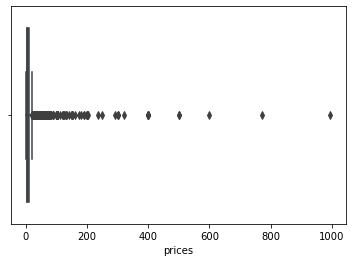

In [49]:
sns.boxplot(data=games, x='prices')

Se observa una gran dispersión en los precios, es por eso que voy a limitar el gráfico para ver su distribución con un valor razonable.

**Aclaración:** De acuerdo al `describe()` realizado anteriormente, el 75% de los precios son menores a 10USD. Sin embargo, no voy a limitarlo a ese valor ya que estaría sacando del mismo juegos con valores más caros, pero posibles. 
Entiendo que si se limita a los juegos menores a 10USD se estaría sesgando el modelo dado que son juegos, en general, casuales, indies, etc.

Me parece que un valor razonable sería juegos menores a 50USD para que entren otros tipos

<AxesSubplot:xlabel='prices'>

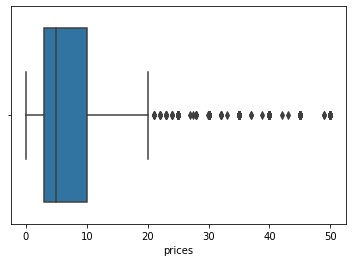

In [50]:
sns.boxplot(data=games.loc[games.prices <= 50], x='prices')

In [51]:
games = games[games.prices <= 50]
games.shape

(31817, 12)

In [52]:
games.head()

,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",False,670290,Poolians.com,Mostly Positive,0.00
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],False,767400,彼岸领域,NaN,0.99
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",False,773570,NaN,NaN,2.99


Por el momento con el tratamiento realizado hasta ahora, alcanza para continuar con el modelo. Por esto, lo que voy a hacer es guardarlo en un csv

In [53]:
#games.to_csv('games_filtrado.csv',index=False)

Levanto el archivo de games que guardé en la linea anterior

In [4]:
#games = pd.read_csv('games_filtrado.csv')

#### Pregunta a responder con los datasets obtenidos, luego de realizar una limpieza

Analizar si hay una posible relación entre las horas jugadas por los usuarios en los juegos con y sin acceso anticipado

In [54]:
juegosAA = set(reviews[reviews['early_access_bool'] == 1]['product_id']) # Obtengo los juegos que tuvieron Acceso Anticipado
juegosAA

{'701280',
 '664750',
 '336300',
 '674250',
 '502720',
 '686200',
 '374040',
 '410840',
 '299740',
 '643980',
 '607200',
 '597920',
 '230230',
 '464350',
 '246110',
 '464470',
 '420550',
 '373750',
 '324810',
 '338530',
 '341570',
 '393930',
 '463920',
 '628570',
 '483850',
 '236110',
 '689570',
 '341710',
 '658490',
 '265810',
 '360510',
 '523080',
 '340770',
 '618640',
 '394760',
 '423490',
 '710610',
 '251950',
 '409910',
 '521330',
 '614030',
 '604490',
 '244030',
 '628770',
 '656200',
 '354770',
 '492410',
 '263720',
 '355420',
 '436520',
 '427730',
 '371520',
 '387090',
 '386350',
 '268750',
 '563360',
 '302670',
 '509190',
 '460560',
 '355010',
 '398850',
 '679270',
 '315070',
 '613730',
 '365020',
 '648430',
 '243970',
 '305960',
 '646570',
 '696370',
 '577230',
 '262060',
 '270150',
 '307880',
 '454540',
 '318090',
 '415590',
 '622470',
 '450850',
 '650350',
 '461720',
 '730270',
 '338170',
 '321360',
 '295690',
 '552100',
 '468160',
 '666730',
 '293480',
 '364050',
 '427640',

In [55]:
reviewsAA = reviews[reviews.product_id.isin(juegosAA)] # Me quedo solo con las reviews de los juegos del listado anterior
reviewsAA.head()

,username,hours,products,product_id,date,found_funny,early_access_bool
108,Sentient_Toaster,30.5,155.0,335620,2018-01-03,0.0,1
117,Diarmuhnd,45.5,83.0,335620,2018-01-02,0.0,1
165,Karteezy,0.7,168.0,369080,2017-11-15,70.0,1
169,ODIN,2.5,171.0,369080,2017-06-11,145.0,1
182,shootersjeep,0.3,90.0,556300,2017-11-27,0.0,1


In [56]:
# Realizo un groupby para sobre el nuevo dataframe en la columna de "product_id"
g = reviewsAA.groupby('product_id')

In [57]:
# Como ya lo tengo agrupado por product_id ahora voy a condicionar el promedio 
# para que lo realice si early_access = 0 (sin acceso anticipado)
sinAA = g.apply(lambda x: x[x['early_access_bool'] == 0]['hours'].mean())
sinAA

product_id
108600          NaN
116100     2.433333
200150     1.250000
206500          NaN
207140    15.874319
            ...    
752910          NaN
756600          NaN
758990          NaN
760860          NaN
760930          NaN
Length: 1662, dtype: float64

In [58]:
# Ahora realizo lo mismo pero para early_access =1 (con acceso anticipado)
conAA = g.apply(lambda x: x[x['early_access_bool'] == 1]['hours'].mean())
conAA

product_id
108600    21.003810
116100     9.875000
200150     5.630000
206500    17.032317
207140    16.926575
            ...    
752910     4.825000
756600     1.600000
758990    15.200000
760860     0.800000
760930     0.500000
Length: 1662, dtype: float64

In [59]:
df = {'prod_id':conAA.index, 'conAA':conAA, 'sinAA':sinAA} # Le doy forma al dataframe con las columnas que quiero

In [60]:
df_relacion = pd.DataFrame(df) # Creo el dataframe
print('Shape:',df_relacion.shape)
df_relacion.head()

Shape: (1662, 3)


,prod_id,conAA,sinAA
product_id,,,
108600,108600,21.003810,NaN
116100,116100,9.875000,2.433333
200150,200150,5.630000,1.250000
206500,206500,17.032317,NaN
207140,207140,16.926575,15.874319


In [61]:
# Ahora que tengo el dataframe voy a empezar eliminando los NaN ya que no me aportan información a lo que yo estoy buscando
df_relacion = df_relacion.dropna()
print('Shape:',df_relacion.shape)
df_relacion.head()

Shape: (625, 3)


,prod_id,conAA,sinAA
product_id,,,
116100,116100,9.875000,2.433333
200150,200150,5.630000,1.250000
207140,207140,16.926575,15.874319
211820,211820,28.768148,30.177442
214190,214190,8.525926,9.618841


In [62]:
# Agrego una columna que indique la relación entre la cantidad de horas jugadas con acceso anticipado y
# la cantidad de horas jugadas sin acceso anticipado para cada juego
df_relacion['relacion'] = df_relacion['conAA']/df_relacion['sinAA']
df_relacion.head()

,prod_id,conAA,sinAA,relacion
product_id,,,,
116100,116100,9.875000,2.433333,4.058219
200150,200150,5.630000,1.250000,4.504000
207140,207140,16.926575,15.874319,1.066287
211820,211820,28.768148,30.177442,0.953300
214190,214190,8.525926,9.618841,0.886378


In [63]:
# Veo la cantidad de juegos que fueron jugados de manera similar entre aquellos usuarios que tuvieron acceso anticipado y los que no
df_relacion[np.logical_and(df_relacion.relacion >= 0.70, df_relacion.relacion <= 1.30)]

,prod_id,conAA,sinAA,relacion
product_id,,,,
207140,207140,16.926575,15.874319,1.066287
211820,211820,28.768148,30.177442,0.953300
214190,214190,8.525926,9.618841,0.886378
214420,214420,8.515625,9.977515,0.853482
219990,219990,29.174000,28.448540,1.025501
...,...,...,...,...
610380,610380,2.200000,2.166667,1.015385
612370,612370,9.614286,9.900000,0.971140
619310,619310,8.025000,10.950000,0.732877


In [64]:
# Veo la cantidad de juegos que fueron jugados por muchas más horas por aquellas personas que no tuvieron acceso anticipado
df_relacion[df_relacion.relacion < 0.70]

,prod_id,conAA,sinAA,relacion
product_id,,,,
226100,226100,5.650000,18.333333,0.308182
226860,226860,14.607692,26.003974,0.561748
227060,227060,5.700000,21.276471,0.267902
227860,227860,15.263507,24.115385,0.632936
229580,229580,5.617241,9.561905,0.587461
...,...,...,...,...
641780,641780,1.866667,24.500000,0.076190
643980,643980,5.633333,19.000000,0.296491
662910,662910,3.500000,8.400000,0.416667


In [65]:
# Veo la cantidad de juegos que fueron jugados por muchas más horas por aquellas personas que sí tuvieron acceso anticipado
df_relacion[df_relacion.relacion > 1.30]

,prod_id,conAA,sinAA,relacion
product_id,,,,
116100,116100,9.875000,2.433333,4.058219
200150,200150,5.630000,1.250000,4.504000
230860,230860,25.600000,10.758824,2.379442
235380,235380,19.080000,11.525581,1.655448
239840,239840,28.964286,20.847368,1.389350
...,...,...,...,...
580040,580040,8.514286,4.750000,1.792481
587460,587460,8.000000,6.050000,1.322314
614030,614030,2.400000,0.600000,4.000000


##### Conclusión

No se evidencia que haya una relación entre la cantidad de horas jugadas por las personas que tienen acceso anticipado en un juego y las que no lo tienen.

Como se puede observar hice 3 grupos, y en los mismos la cantidad de registros que hay son muy parecidos

De todas  maneras, cabe aclarar que solo se pudieron utilizar cerca de 600 juegos, los cuales contaban con acceso anticipado. Lo ideal sería volver a analizar esto pero con un universo mucho mayor, de manera de poder sacar mejores conclusiones


### Modelo de Machine Learning

Para el sistema de recomendación, voy a realizar un filtro colaborativo. Este modelo se basa en encontrar similitudes entre usuairos, de manera de poder recomendar juegos en base a lo que otros usuarios, con similares gustos, jugaron.

Haciendo uso de la librería de Surprise, voy a crear mi sistema de recomendación de juegos. De acuerdo a lo visto en clase, para que la librería funcione correctamente, hay que darle un dataframe con un formato en particular, el cual es:

***User ID | Game ID | Ranking***

Dado que no tenemos en nuestro dataset el ID del usuario ni el ranking, voy a arrancar a crear esto

#### Asignación de ID a los usuarios

Para esto voy crear un diccionario con los nombres de los usuarios, que de acuerdo a lo analizado anteriormente, los nombres se los puede tomar como únicos. A cada uno de estos usuarios les voy a asignar un ID

In [66]:
print("Shape del dataset 'reviews':",reviews.shape)
reviews.head()

Shape del dataset 'reviews': (492188, 7)


,username,hours,products,product_id,date,found_funny,early_access_bool
0,Chaos Syren,0.1,41.0,725280,2017-12-17,0.0,0
4,the_maker988,8.2,18.0,35140,2018-01-02,0.0,0
5,Szudof,0.2,155.0,288690,2016-08-31,3.0,0
6,Vonder,2.7,264.0,35600,2017-04-15,0.0,0
7,LucaFox,4.0,136.0,620900,2017-09-11,1.0,0


Luego de haber intentado obtener los IDs de cada vendor, noté que algunos de ellos tenian valores nulos en los nombres, es por esto que los listo abajo y luego los elimino

In [67]:
reviews.loc[reviews.username.isna() == True]

,username,hours,products,product_id,date,found_funny,early_access_bool


In [68]:
reviews = reviews.drop(reviews.loc[reviews.username.isna() == True].index)
reviews.shape

(492188, 7)

Ahora si, obtengo todos los nombres de los usuarios para armar un listado de nombres únicos

In [69]:
usuarios = reviews.username.unique()
usuarios

array(['Chaos Syren', 'the_maker988', 'Szudof', ..., 'ｒｈ¥ｎｏ',
       'Apple Cheesepie', 'ZJbroski'], dtype=object)

Para la asignación de IDs voy a hacer una asignación manual desde 1 hasta el número de usuarios únicos que haya

In [70]:
len(usuarios)

367564

In [71]:
# Creo el listado de IDs con valores consecutivos desde 1 hasta el largo del array +1 
ids = np.arange(1,len(usuarios)+1)
ids

array([     1,      2,      3, ..., 367562, 367563, 367564])

In [72]:
df = {'id_user':ids, 'username':usuarios} # Armo la matriz con el formato "id | username"

In [73]:
# Creo el dataframe a partir de la matriz
id_user = pd.DataFrame(df)
print("shape del Dataframe:", id_user.shape)
id_user.head()

shape del Dataframe: (367564, 2)


,id_user,username
0,1,Chaos Syren
1,2,the_maker988
2,3,Szudof
3,4,Vonder
4,5,LucaFox


In [74]:
# Ahora que tengo todos los usuarios con su respectivo ID, tengo que agregar ese id 
# a cada una de las opiniones en el dataframe de reviews

reviews = reviews.join(id_user.set_index('username'), on='username')
print(reviews.shape)
reviews

(492188, 8)


,username,hours,products,product_id,date,found_funny,early_access_bool,id_user
0,Chaos Syren,0.1,41.0,725280,2017-12-17,0.0,0,1
4,the_maker988,8.2,18.0,35140,2018-01-02,0.0,0,2
5,Szudof,0.2,155.0,288690,2016-08-31,3.0,0,3
6,Vonder,2.7,264.0,35600,2017-04-15,0.0,0,4
7,LucaFox,4.0,136.0,620900,2017-09-11,1.0,0,5
...,...,...,...,...,...,...,...,...
779280,Apple Cheesepie,48.7,191.0,252490,2013-12-12,0.0,1,367563
779292,ZJbroski,18.7,205.0,252490,2013-12-11,0.0,1,367564
779298,Slavic Psycho,3.9,135.0,252490,2013-12-11,0.0,1,241349
779299,Marinetag1,1.3,98.0,252490,2013-12-11,0.0,1,255139


In [75]:
reviews.loc[reviews['id_user'] == 15] # Hago una prueba para ver que esté bien la asignacion de IDs

,username,hours,products,product_id,date,found_funny,early_access_bool,id_user
26,Universal Gamer,11.2,89.0,267670,2017-06-03,0.0,0,15
187,Universal Gamer,2.5,89.0,233550,2017-06-03,0.0,0,15
160715,Universal Gamer,3.5,89.0,410980,2017-01-01,0.0,0,15
239821,Universal Gamer,3.1,89.0,482890,2017-01-01,0.0,0,15
282231,Universal Gamer,1.4,89.0,233980,2017-12-18,0.0,0,15
516529,Universal Gamer,15.0,89.0,317820,2017-11-28,0.0,0,15
604745,Universal Gamer,0.1,89.0,512470,2017-05-26,0.0,0,15


In [76]:
# Guardo el archivo en un csv para poder acceder más rapido
#reviews.to_csv('reviews_filtrado_idUsers.csv',index=False)

En este momento cuento con un dataset en donde asocié el usuario con su review y el ID del usuario.

Lo que debo realizar ahora es asignar un ranking arbitrario para ver si al usuario le gustó o no el juego. Al no contar con este dato, lo que voy a hacer es darle un ranking entre 1 y 5 dependiendo de la cantidad de horas que jugó el juego 

Para arrancar con esto voy a analizar cómo se distribuyen las horas jugadas para las diferentes reviews

C:\Users\nicob\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours', ylabel='Density'>

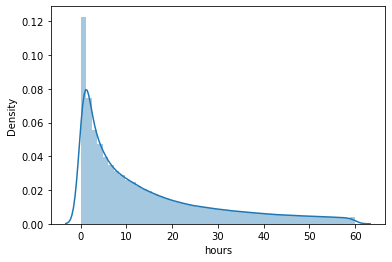

In [77]:
sns.distplot(a=reviews.hours)

Voy a iniciar probando con el metodo "cut" de la librería de pandas

In [78]:
pd.cut(reviews.hours, 5)

0         (-0.06, 12.0]
4         (-0.06, 12.0]
5         (-0.06, 12.0]
6         (-0.06, 12.0]
7         (-0.06, 12.0]
              ...      
779280     (48.0, 60.0]
779292     (12.0, 24.0]
779298    (-0.06, 12.0]
779299    (-0.06, 12.0]
779303     (48.0, 60.0]
Name: hours, Length: 492188, dtype: category
Categories (5, interval[float64]): [(-0.06, 12.0] < (12.0, 24.0] < (24.0, 36.0] < (36.0, 48.0] < (48.0, 60.0]]

El resultado de los bins de esta manera no me resulta el más adecuado ya que la gran mayoría de los ranking serían de 1, dado que ahí se encuentra la mayoría, aunque entiendo que si alguien juega mas de 10 horas a un juego debería agradarle.

Por esta razón, voy a asignarle el ranking yo de manera manual de la siguiente manera:

 - Entre 0 y 3hs   -> 1 Estrella
 - Entre 3 y 7hs   -> 2 Estrellas
 - Entre 7 y 15hs  -> 3 Estrellas
 - Entre 15 y 25hs -> 4 Estrellas
 - Mas de 25 hs    -> 5 Estrellas

In [79]:
bins = [-1,3,7,15,25,61]
labels = [1,2,3,4,5]
reviews['ranking'] = pd.cut(reviews['hours'],bins=bins,labels=labels)

In [80]:
reviews.head()

,username,hours,products,product_id,date,found_funny,early_access_bool,id_user,ranking
0,Chaos Syren,0.1,41.0,725280,2017-12-17,0.0,0,1,1
4,the_maker988,8.2,18.0,35140,2018-01-02,0.0,0,2,3
5,Szudof,0.2,155.0,288690,2016-08-31,3.0,0,3,1
6,Vonder,2.7,264.0,35600,2017-04-15,0.0,0,4,1
7,LucaFox,4.0,136.0,620900,2017-09-11,1.0,0,5,2


In [81]:
reviews.ranking.isna().sum()

0

Ahora si, ya tengo todo lo  necesario para hacer el dataframe con los datos que necesito para mi modelo de machine learning

In [82]:
columns = ['id_user','product_id','ranking']
df_ranking = reviews[columns]

In [83]:
df_ranking

,id_user,product_id,ranking
0,1,725280,1
4,2,35140,3
5,3,288690,1
6,4,35600,1
7,5,620900,2
...,...,...,...
779280,367563,252490,5
779292,367564,252490,4
779298,241349,252490,2
779299,255139,252490,1


Guardo el dataset recién generado en un csv

In [84]:
#df_ranking.to_csv('DS_rankings.csv',index=False)

Levanto el archivo del csv creado

In [34]:
#df_ranking = pd.read_csv('DS_rankings.csv')
#df_ranking

,id_user,product_id,ranking
0,1,725280,1
1,2,35140,3
2,3,288690,1
3,4,35600,1
4,5,620900,2
...,...,...,...
492172,367561,252490,5
492173,367562,252490,4
492174,241348,252490,2
492175,255138,252490,1


Comienzo con la creación del modelo de machine learning.

Para esto, requiero de un `reader()` para ir recorriendo el archivo y leerlo

In [85]:
reader = Reader()

Como voy a hacer uso de la librería Surprise, voy a crear el dataset usando los métodos de esta libreria

In [102]:
N_filas = 200000 # Limito el dataset a N_filas
ds = Dataset.load_from_df(df_ranking[['id_user', 'product_id', 'ranking']][:N_filas], reader) # Creo el dataset

In [103]:
# Luego, realizo el train test split 
trainset, testset = train_test_split(ds, test_size=.25)

In [104]:
# Creo mi modelo sin hiperparámetros
modelo = SVD()

In [105]:
# Entreno el modelo con los datos de entrenamiento
modelo.fit(trainset)

In [106]:
# Predigo con los datos de test
pred = modelo.test(testset)

Para poder evaluar mi modelo, voy a utilizar como metrica el RMSE ya que de acuerdo a lo leído en internet, es considerada una de las métricas más robustas para los sistemas de recomendación. Además esta métrica, hace una mayor penalización sobre los desvíos más grandes, quiero que se considere como "peor error" un desvío más alto sobre otro más bajo

In [107]:
# Caldulo el error con RMSE sobre mis predicciones
accuracy.rmse(pred)

RMSE: 1.2902


1.29016142493459

### Optimización de hiperparámetros

Utilizando como modelo de benchmark el modelo recién creado, voy a hacer una búsqueda para mejorar los hiperparámetros haciendo uso de GridSerch con Cross Validation, ya que esta es la opcion que trae la librería de Surprise para optimización de hiperparámetros

In [100]:
# Realizo la grilla con las opciones de hiperparámetros a ser evaluados 
param_grid = {'n_factors': [5,10,15,25,50,100,125,150],'n_epochs': [5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
# Voy a utilziar un cv=5 
gs_cv = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = -1)
gs_cv.fit(ds)

In [101]:
print(gs_cv.best_score['rmse'])
print(gs_cv.best_params['rmse'])

1.284213084511885
{'n_factors': 15, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


### Creación del mejor modelo encontrado

Luego de haber realizado la optimización de hiperparámetros con GridSerch + CV voy a crear un nuevo modelo con los mejores hiperparámetros que fueron encontrados

In [4]:
# Levanto el CSV con las reviews filtradas
#reviews = pd.read_csv('reviews_filtrado_idUsers.csv')
#reviews.head()

In [5]:
# Levanto el CSV con los juegos filtradas
#games = pd.read_csv('games_filtrado.csv')
#games.head()

In [22]:
# Levanto el CSV con el data set con el ranking
#df_ranking = pd.read_csv('DS_rankings.csv')
#df_ranking.head()

,id_user,product_id,ranking
0,1,725280,1
1,2,35140,3
2,3,288690,1
3,4,35600,1
4,5,620900,2


In [24]:
# Levanto el CSV con el formato para el sistema de recomendacion
#reader = Reader()
#N_filas = 200000 # Limito el dataset a N_filas
#ds = Dataset.load_from_df(df_ranking[['id_user', 'product_id', 'ranking']][:N_filas], reader) # Creo el dataset

In [25]:
#trainset, testset = train_test_split(ds, test_size=.25) # Hago el train/test split de los datos

In [108]:
# De acuerdo al gridserchcv los mejores hiperparámetros son:
#'n_factors': 15, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
svd = SVD(n_factors=15,n_epochs=20,lr_all=0.005,reg_all=0.02)

In [109]:
svd.fit(trainset)

In [110]:
svd_pred = svd.test(testset)

In [111]:
accuracy.rmse(svd_pred)

RMSE: 1.2892


1.2891873239759344

In [112]:
# Veo cómo está compuesta la variable "svd_pred", la cual contiene todos las predicciones sobre el el set de prueba
svd_pred

[Prediction(uid=133909, iid='275850', r_ui=4.0, est=3.3449031482884526, details={'was_impossible': False}),
 Prediction(uid=14982, iid='314070', r_ui=3.0, est=3.586077715784716, details={'was_impossible': False}),
 Prediction(uid=72519, iid='272060', r_ui=1.0, est=1, details={'was_impossible': False}),
 Prediction(uid=93851, iid='266430', r_ui=1.0, est=1.9268843596596974, details={'was_impossible': False}),
 Prediction(uid=153717, iid='244870', r_ui=2.0, est=1.9592620918810177, details={'was_impossible': False}),
 Prediction(uid=116141, iid='262470', r_ui=3.0, est=2.21950194328991, details={'was_impossible': False}),
 Prediction(uid=75307, iid='528610', r_ui=1.0, est=2.157878767766629, details={'was_impossible': False}),
 Prediction(uid=90871, iid='319630', r_ui=4.0, est=3.430392954549088, details={'was_impossible': False}),
 Prediction(uid=147638, iid='218230', r_ui=3.0, est=3.089931724558502, details={'was_impossible': False}),
 Prediction(uid=106791, iid='210770', r_ui=1.0, est=2.81

Como se puede observar, lo que realiza la predicción sobre los datos de prueba es darle un ranking a los juegos de dicho set de datos. Con esto, se puede medir la diferencia entre el ranking real y el ranking predicho. Mientras menor sea la diferencia, más bajo va a dar el error, medido en este caso con el RMSE.

De acuerdo a lo visto en clase, y lo consultado en internet, para poder predecir en qué medida a un usuario le puede gustar un juego, lo que hace el algoritmo es ver qué otras cosas jugó ese usuario y buscar otros usuarios que hayan jugado esos juegos. De esta manera, el algoritmo puede elegir juegos de esos usuarios para poder sugerirlos como juegos recomendados al usuario

### Prueba del modelo con ejemplos

Ahora que tengo el modelo con los mejores hiperparámentros encontrados, voy a realizar algunas pruebas para ver qué resultados me arroja.

Para esto voy a utilizar un usuario cualquiera y ver qué juegos me recomienda de acuerdo a lo que haya jugado el mismo

In [113]:
# Elijo un usuario al azar
uid = 14
reviews[reviews.id_user == uid]

,username,hours,products,product_id,date,found_funny,early_access_bool,id_user,ranking
25,Mia,31.4,149.0,631920,2017-09-14,0.0,0,14,5
144745,Mia,6.5,107.0,104900,2012-05-04,0.0,0,14,2
161156,Mia,8.9,54.0,362810,2015-10-09,0.0,0,14,3
202138,Mia,20.1,114.0,207610,2017-08-27,0.0,0,14,4
251461,Mia,8.9,149.0,521330,2016-09-14,2.0,1,14,3
256128,Mia,16.1,301.0,245170,2014-06-19,0.0,0,14,4
442948,Mia,0.6,170.0,8190,2015-11-30,0.0,0,14,1
512601,Mia,7.6,116.0,346140,2017-11-05,0.0,0,14,3
654788,Mia,47.7,114.0,208650,2016-10-04,0.0,0,14,5


In [114]:
# Guardo solo los juegos que fueron jugados por el usuario
jugados = df_ranking[df_ranking['id_user'] == uid]
print(jugados.shape)
jugados.head()

(9, 3)


,id_user,product_id,ranking
25,14,631920,5
144745,14,104900,2
161156,14,362810,3
202138,14,207610,4
251461,14,521330,3


In [115]:
rank = 4   # Quiero ver los juegos que tuvieron como minimo 4 puntos
df_user = df_ranking[(df_ranking['id_user'] == uid) & (df_ranking['ranking'] >= rank)]
df_user = df_user.reset_index(drop=True)
df_user['Juego'] = df_user.join(games.set_index('id'),on='product_id')['app_name']
print(df_user.shape)
df_user

(4, 4)


,id_user,product_id,ranking,Juego
0,14,631920,5,Somewhere on Zibylon
1,14,207610,4,The Walking Dead
2,14,245170,4,Skullgirls
3,14,208650,5,Batman™: Arkham Knight


In [116]:
# En un nuevo dataframe agrego todos los juegos que hay y le pongo como index el id del juego
columnas = ['publisher','genres','title','release_date','tags','specs','early_access','developer','sentiment','prices']
juegos = games.drop(columns=columnas)
juegos= juegos.set_index('id')
print(juegos.shape)
juegos.head()

(31817, 1)


,app_name
id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,Log Challenge


In [117]:
# Ahora elimino del listado total de juegos, los ya jugados por el usuario
juegos.drop(jugados.product_id.values,inplace=True)
juegos = juegos.reset_index()
print(juegos.shape)
juegos.head()

(31808, 2)


,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge


In [118]:
# Usando la función de "predict" de mi modelo, voy a estimar el ranking por cada juego que no jugó el usuario
juegos['rank_estimado'] = juegos['id'].apply(lambda x: svd.predict(uid, x).est)

# Ordeno el ranking de mayor a menor e imprimo los 10 primeros, es decir los juegos con mayor afinididad con ese usuario
juegos = juegos.sort_values('rank_estimado', ascending=False)
print(juegos.head(10))

           id                                    app_name  rank_estimado
23234  413420              Danganronpa 2: Goodbye Despair       4.882246
6616   294100                                    RimWorld       4.674112
19426  429660                          Tales of Berseria™       4.648263
26778  291650                         Pillars of Eternity       4.537936
27423  337930    Nameless ~The one thing you must recall~       4.525268
1666   238010  Deus Ex: Human Revolution - Director's Cut       4.511336
22984  281990                                   Stellaris       4.500735
16467  237850                          Dreamfall Chapters       4.481040
2354   292910               Deponia: The Complete Journey       4.477199
27935  261640                 Borderlands: The Pre-Sequel       4.463113


Ahora que tengo los juegos que, de acuerdo al sistema de recomendación, más le pueden gustar al usuario, voy a ver sus características para analizar si, a priori, pueden ser correctas

In [119]:
top10 = juegos['id'].head(10)
desc = games[games.id.isin(top10.values)]
desc

,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
1673,"Square Enix, Feral Interactive (Mac)","[Action, RPG]",Deus Ex: Human Revolution - Director's Cut,Deus Ex: Human Revolution - Director's Cut,2013-10-25,"[Cyberpunk, Stealth, RPG, Sci-fi, FPS, Action,...","[Single-player, Steam Achievements, Steam Trad...",False,238010,"Eidos Montreal,Feral Interactive (Mac)",Very Positive,19.99
2370,Daedalic Entertainment,[Adventure],Deponia: The Complete Journey,Deponia: The Complete Journey,2014-07-08,"[Adventure, Point & Click, Comedy, Singleplaye...","[Single-player, Steam Achievements, Steam Trad...",False,292910,Daedalic Entertainment,Very Positive,39.99
6666,Ludeon Studios,"[Indie, Simulation, Strategy, Early Access]",RimWorld,RimWorld,2016-07-15,"[Early Access, Base Building, Survival, Strate...","[Single-player, Steam Workshop, Steam Cloud]",True,294100,Ludeon Studios,Overwhelmingly Positive,29.99
16664,Red Thread Games,"[Adventure, Indie]",Dreamfall Chapters,Dreamfall Chapters,2017-07-21,"[Adventure, Story Rich, Female Protagonist, At...","[Single-player, Steam Achievements, Full contr...",False,237850,Red Thread Games,Very Positive,24.99
19645,BANDAI NAMCO Entertainment,"[Action, RPG]",Tales of Berseria™,Tales of Berseria™,2017-01-26,"[Anime, JRPG, RPG, Female Protagonist, Action,...","[Single-player, Shared/Split Screen, Steam Ach...",False,429660,BANDAI NAMCO Studios Inc.,Overwhelmingly Positive,49.99
23232,Paradox Interactive,"[Simulation, Strategy]",Stellaris,Stellaris,2016-05-09,"[Space, Strategy, Grand Strategy, Sci-fi, 4X, ...","[Single-player, Multi-player, Cross-Platform M...",False,281990,Paradox Development Studio,Very Positive,39.99
23484,"Spike Chunsoft Co., Ltd.",[Adventure],Danganronpa 2: Goodbye Despair,Danganronpa 2: Goodbye Despair,2016-04-18,"[Anime, Visual Novel, Detective, Mystery, Stor...","[Single-player, Steam Achievements, Full contr...",False,413420,"Spike Chunsoft Co., Ltd.,Abstraction Games",Overwhelmingly Positive,19.99
27061,Paradox Interactive,[RPG],Pillars of Eternity,Pillars of Eternity,2015-03-26,"[RPG, Fantasy, Isometric, Story Rich, Singlepl...","[Single-player, Steam Achievements, Steam Trad...",False,291650,Obsidian Entertainment,Very Positive,29.99
27710,Cheritz,[Simulation],Nameless ~The one thing you must recall~,Nameless ~The one thing you must recall~,2013-11-11,"[Otome, Dating Sim, Visual Novel, Simulation, ...","[Single-player, Steam Trading Cards, Steam Cloud]",False,337930,"Sujin Ri,Yunjeong Yun,Hyein Go,Minsu Ock,Marco...",Very Positive,29.99
28228,"2K, Aspyr (Mac and Linux)","[Action, RPG]",Borderlands: The Pre-Sequel,Borderlands: The Pre-Sequel,2014-10-14,"[Co-op, Action, FPS, Comedy, Loot, RPG, Open W...","[Single-player, Co-op, Steam Achievements, Ful...",False,261640,"2K Australia,Gearbox Software,Aspyr (Mac and L...",Very Positive,39.99


In [120]:
# Veo ahora la desripcion de los juegos que más le gustaron (4 o 5 puntos en el ranking)
df_user.head()

,id_user,product_id,ranking,Juego
0,14,631920,5,Somewhere on Zibylon
1,14,207610,4,The Walking Dead
2,14,245170,4,Skullgirls
3,14,208650,5,Batman™: Arkham Knight


In [121]:
id_jugados = df_user['product_id']
desc_jugados = games[games.id.isin(id_jugados.values)]
desc_jugados

,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
15610,Mykhail Konokh,"[Action, Indie]",Somewhere on Zibylon,Somewhere on Zibylon,2017-09-14,"[Indie, Action, Puzzle, Exploration, Crafting,...","[Single-player, Steam Achievements, Steam Trad...",False,631920,Mykhail Konokh,Positive,9.99
26283,Warner Bros. Interactive Entertainment,"[Action, Adventure]",Batman™: Arkham Knight,Batman™: Arkham Knight,2015-06-23,"[Batman, Action, Open World, Superhero, Advent...","[Single-player, Steam Achievements, Full contr...",False,208650,Rocksteady Studios,Mostly Positive,19.99
30060,"Marvelous, Autumn Games","[Action, Indie]",Skullgirls,Skullgirls,2013-08-22,"[Fighting, 2D Fighter, Indie, Multiplayer, Ani...","[Single-player, Multi-player, Steam Achievemen...",False,245170,Lab Zero Games,Overwhelmingly Positive,9.99
30999,Telltale Games,[Adventure],The Walking Dead,The Walking Dead,2012-04-24,"[Zombies, Adventure, Story Rich, Point & Click...","[Single-player, Steam Achievements, Full contr...",False,207610,Telltale Games,Overwhelmingly Positive,24.99


#### Conclusiones

Viendo la lista que predijo el sistema de recomendación encuentro bastante acertadas las recomendaciones, en general se puede observar que predominan los juegos de accion/aventura y todos de tipo "single-player". El único que encuentro raro es el juego de carrera que le recomendaría jugar, ya que dentro de los juegos jugados con más de 4 estrellas no hay ninguno de carrera.

De todas maneras, se debe entender que el sistema no recomienda por similitud de juegos, sino que recomienda en base a lo ue jugaron otros usuarios con gustos parecidos. 

Estoy conforme con el resultado del sistema de recomendación.

### Parte C -  Investigación

Dado que este sistema de recomendación se basó en un filtro colaborativo, lo que me gustaría probar es realizar un filtro basado en contenido.

De acuerdo a lo visto en clase, en un filtro basado en contenido, las recomendaciones del sitema se basan en las características propias de los items a recomendar, en este caso juegos. A diferencia del filtro colaborativo, aca no es necesario buscar información de otros usuarios para poder recomendar, lo cual resulta algo positivo. Sin embargo un punto negativo es la necesidad de "armarle el perfil" a los juegos.

Va a costar bastante esfuerzo limpiar y transformar el dataset "games" ya que lo que deberíamos hacer es obtener todos los valores únicos de las distintas listas en las columnas (como por ejemplo género, tags, etc) y llevar cada uno de esos valores a columnas unicas. Esto es una especie de "encoding one hot". De esta manera, se lograría un perfil mucho más específico para cada juego, de manera de darle al usuario una recomendación más acertada

A modo de ejemplo sencillo y a alto nivel, voy a realizar búsquedas de juegos con similares características, es decir, cuyos "perfiles" sean parecidos

In [122]:
games.head()

,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",False,670290,Poolians.com,Mostly Positive,0.00
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],False,767400,彼岸领域,NaN,0.99
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",False,773570,NaN,NaN,2.99


In [123]:
# Elijo un usuario
user = 10
reviews[reviews.id_user == user] # Busco los juegos que jugó

,username,hours,products,product_id,date,found_funny,early_access_bool,id_user,ranking
19,dll3z,0.4,314.0,328100,2017-03-07,0.0,0,10,1
105999,dll3z,20.2,314.0,356570,2015-12-10,0.0,0,10,4
474455,dll3z,12.9,314.0,368370,2015-12-04,0.0,0,10,3


In [124]:
# Busco la descripción de los juegos
user_juegos = games[games.id.isin(reviews[reviews.id_user == user]['product_id'].values)]
user_juegos

,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
2834,KISS ltd,"[Adventure, Indie, RPG]",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"[Adventure, RPG, Indie, Puzzle, Match 3]",[Single-player],False,328100,Ino-Co Plus,Mixed,14.99
25751,tinyBuild,"[Action, Indie, Strategy]",Party Hard,Party Hard,2015-08-25,"[Pixel Graphics, Strategy, Stealth, Indie, Act...","[Single-player, Local Co-op, Shared/Split Scre...",False,356570,"Pinokl Games,Kverta",Very Positive,12.89
26317,Sam Barlow,"[Adventure, Indie, Simulation]",Her Story,Her Story,2015-06-24,"[Detective, FMV, Indie, Story Rich, Female Pro...","[Single-player, Steam Achievements, Steam Trad...",False,368370,Sam Barlow,Very Positive,5.99


In [125]:
# Obtengo las características de los juegos que jugó (a modo de ejemplo)
genres = user_juegos.genres.values
tags = user_juegos.tags.values
specs = user_juegos.specs.values
sentiments = user_juegos.sentiment.values

Ahora que tengo un poco más en detalle las características de sus juegos voy a armar un perfil del juego recomendado. Para esto, para hacerlo de manera más sencilla, voy a buscar dentro de esas listas el valor que más se repite de cada una.

Como es una lista con listas adentro, voy a armar dos funciones:
1. Función que me devuelve una lista con todos los elementos dentro de las listas
2. Función que me devuelve el valor más frecuente

In [134]:
import ast

def listaDeListas(listas):
    unicos = []
    
    for lista in listas:
        #lista = ast.literal_eval(lista)
        for value in lista:
            unicos.append(value)
            
    return unicos

In [127]:
def masFrecuente(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

Comienzo buscando el género más frencuete

In [135]:
generos = listaDeListas(genres)
generos

['Adventure',
 'Indie',
 'RPG',
 'Action',
 'Indie',
 'Strategy',
 'Adventure',
 'Indie',
 'Simulation']

In [136]:
genero_masFrec = masFrecuente(generos)
genero_masFrec

'Indie'

Ahora busco el tag más frecuente

In [137]:
etiquetas = listaDeListas(tags)
tags

array([list(['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match 3']),
       list(['Pixel Graphics', 'Strategy', 'Stealth', 'Indie', 'Action', 'Great Soundtrack', 'Violent', 'Singleplayer', 'Gore', 'Villain Protagonist', 'Dark Humor', '2D', 'Retro', 'Difficult', 'Crime', 'Horror', 'Funny', 'Top-Down', 'Comedy', 'Story Rich']),
       list(['Detective', 'FMV', 'Indie', 'Story Rich', 'Female Protagonist', 'Realistic', 'Mystery', 'Adventure', 'Simulation', 'Singleplayer', 'Puzzle', 'Horror', 'Casual', 'Crime', 'Experimental', 'Psychological Horror', 'Visual Novel', 'Point & Click', 'Short'])],
      dtype=object)

In [138]:
tag_masFrec = masFrecuente(etiquetas)
tag_masFrec

'Indie'

Especificación más frecuente

In [139]:
especs = listaDeListas(specs)
especs

['Single-player',
 'Single-player',
 'Local Co-op',
 'Shared/Split Screen',
 'Steam Achievements',
 'Full controller support',
 'Steam Trading Cards',
 'Single-player',
 'Steam Achievements',
 'Steam Trading Cards']

In [140]:
spec_masFrec = masFrecuente(especs)
spec_masFrec

'Single-player'

Sentimiento más frencuente

In [141]:
sent_masFrec = 'Very Positive'

Ahora que tengo esos valores que se repiten en la mayoría de los juegos jugados por el usuario, voy a buscar aquellos juegos que contengan esos valores en los respectivos campos

Para que sea más rapida la búsqueda voy a pasar las columnas a string, en lugar de lista de listas

In [143]:
games['specs'] = games['specs'].astype(str)
games['tags'] = games['tags'].astype(str)
games['genres'] = games['genres'].astype(str)

In [144]:
juegos_similares = games[games['specs'].str.contains(spec_masFrec, na=False)]
print(juegos_similares.shape)
juegos_similares

(27419, 12)


,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",False,670290,Poolians.com,Mostly Positive,0.00
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,"['Action', 'Adventure', 'Casual']",['Single-player'],False,767400,彼岸领域,NaN,0.99
4,NaN,nan,Log Challenge,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",False,773570,NaN,NaN,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']","['Single-player', 'Steam Achievements']",False,773640,"Nikita ""Ghost_RUS""",NaN,1.99
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,"['Strategy', 'Indie', 'Casual']","['Single-player', 'Steam Achievements', 'Steam...",False,733530,Sacada,NaN,4.99
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,2018-01-04,"['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",False,610660,Laush Dmitriy Sergeevich,NaN,1.99
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...","['Single-player', 'Steam Achievements', 'Steam...",False,658870,"xropi,stev3ns",1 user reviews,4.99


In [145]:
juegos_similares = juegos_similares[juegos_similares['genres'].str.contains(genero_masFrec, na=False)]
print(juegos_similares.shape)
juegos_similares.head()

(14190, 12)


,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",False,670290,Poolians.com,Mostly Positive,0.00
6,NaN,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",False,774276,Poppermost Productions,NaN,9.99
7,Poppermost Productions,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",False,774277,Poppermost Productions,NaN,18.99


In [146]:
juegos_similares = juegos_similares[juegos_similares['tags'].str.contains(tag_masFrec, na=False)]
print(juegos_similares.shape)
juegos_similares.head()

(14170, 12)


,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],False,761140,Kotoshiro,NaN,4.99
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",False,643980,Secret Level SRL,Mostly Positive,0.00
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",False,670290,Poolians.com,Mostly Positive,0.00
6,NaN,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",False,774276,Poppermost Productions,NaN,9.99
7,Poppermost Productions,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",False,774277,Poppermost Productions,NaN,18.99


In [147]:
juegos_similares = juegos_similares[juegos_similares['sentiment']== sent_masFrec]
print(juegos_similares.shape)
juegos_similares.head()

(2068, 12)


,publisher,genres,app_name,title,release_date,tags,specs,early_access,id,developer,sentiment,prices
27,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,"['Racing', 'Action', 'Classic', 'Indie', 'Gore...","['Single-player', 'Multi-player', 'Steam Tradi...",False,282010,Stainless Games Ltd,Very Positive,9.99
41,Blazing Griffin Ltd.,"['Action', 'Indie', 'RPG']",The Ship: Murder Party,The Ship: Murder Party,2006-07-11,"['Multiplayer', 'Indie', 'Action', 'First-Pers...","['Single-player', 'Multi-player', 'Steam Tradi...",False,2400,Outerlight Ltd.,Very Positive,9.99
56,Introversion Software,"['Indie', 'Strategy']",DEFCON,DEFCON,2006-09-29,"['Strategy', 'Indie', 'Multiplayer', 'Wargame'...","['Single-player', 'Multi-player']",False,1520,Introversion Software,Very Positive,9.99
60,Unknown Worlds Entertainment,"['Casual', 'Indie']",Zen of Sudoku,Zen of Sudoku,2006-12-14,"['Casual', 'Indie', 'Puzzle']",['Single-player'],False,4900,Unknown Worlds Entertainment,Very Positive,0.00
171,Introversion Software,['Indie'],Multiwinia,Multiwinia,2008-09-19,"['Indie', 'Strategy', 'RTS', 'Multiplayer', 'S...","['Single-player', 'Multi-player', 'Steam Achie...",False,1530,Introversion Software,Very Positive,9.99


En una primera iteración, en donde solo me fije por los valores más frecuentes, logré quedarme con 2068 juegos que contienen esos valores, teniendo originalmente en el dataset de 'games' más de 30 mil juegos. 

Para poder bajar este número, podría realizar otras iteraciones filtrando por los valores de esas características que están como segundas más frecuentes, y así sucesivamente

Una cosa que me resulta importante aclarar es que el ejercicio que acabo de realizar es un simple muestra de cómo se podría ir resolviendo las recomendaciones. Si realizo el sistema de recomendación a través de un filtro basado en contenido, se deberían comparar todas las columnas con las diferentes posibilidades y encontrar un porcentaje de similitud de cada juego con los juegos jugados por el usuario. Lo realizado recién fue simplemente una prueba rápida de muy alto nivel